In [4]:
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
sns.set()

In [3]:
data = pd.read_excel("../../Data/Simulation Results/growth rates tracing adherence.xlsx", index_col = 0)
days_simulated = 25

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/Simulation Results/growth rates tracing adherence.xlsx'

In [3]:
data

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,reduce_contacts_by,two_step_tracing,prob_has_trace_app,prob_household_prop_not_adhere,prob_not_adhere,0,...,15,16,17,18,19,20,21,22,23,24
0,0.826711,0.2,0.918432,1.745319,0.373522,True,0.494691,0.241427,0.036944,5000,...,50146,57024,64658,73184,82570,93204,104878,117815,132130,148194
1,0.822938,0.3,0.718434,2.120258,0.457698,False,0.407553,0.119033,0.023493,5000,...,38356,42653,47125,51951,57203,62829,68888,75359,82287,89786
2,0.811619,0.6,0.738272,2.011819,0.653130,False,0.072193,0.030889,0.028907,5000,...,19829,20734,21635,22516,23308,24019,24685,25354,25983,26570
3,0.830484,0.1,0.888834,2.093165,0.639923,True,0.388804,0.140118,0.027750,5000,...,21973,23524,25103,26654,28216,29818,31473,33173,34862,36571
4,0.807846,0.7,0.933077,2.020412,0.840514,True,0.318710,0.118894,0.012962,5000,...,10765,10886,10978,11063,11127,11170,11216,11251,11273,11302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.815392,0.5,0.884736,1.956071,0.775533,False,0.283914,0.236424,0.029819,5000,...,13159,13455,13735,13967,14171,14374,14554,14710,14847,14981
96,0.807846,0.7,0.938855,2.136855,0.847479,False,0.495060,0.110626,0.012381,5000,...,10547,10671,10767,10823,10886,10948,10990,11010,11037,11051
97,0.811619,0.6,0.813077,1.805257,0.325964,False,0.457789,0.087335,0.027853,5000,...,48698,54079,59975,66316,72777,79792,87304,95090,103522,112559
98,0.815392,0.5,0.859704,2.258597,0.707612,True,0.294505,0.037219,0.046937,5000,...,16760,17362,17941,18520,19071,19544,19978,20416,20817,21193


In [4]:
infection_counts = [str(i) for i in range(days_simulated)]
infection_counts = data[infection_counts]

Text(0.5, 1.0, 'Total Infected')

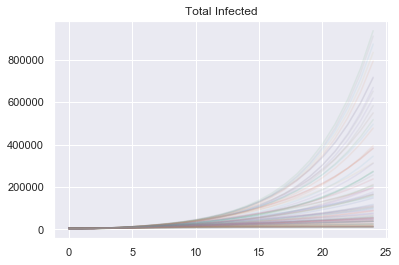

In [5]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected")

Text(0.5, 1.0, '$log_2$(Total Infected)')

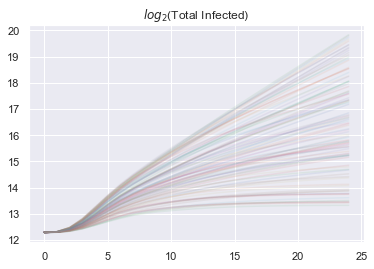

In [6]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].apply(lambda x: np.log2(x)), alpha = 0.1)
plt.title("$log_2$(Total Infected)")

Text(0.5, 1.0, 'Infection Incidence')

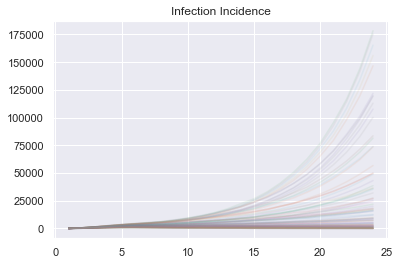

In [7]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.1)
plt.title("Infection Incidence")

Text(0.5, 1.0, 'Infection Incidence (10 epidemics)')

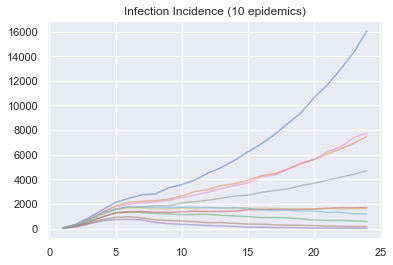

In [8]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.5)
plt.title("Infection Incidence (10 epidemics)")

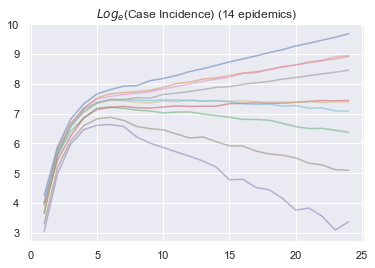

In [9]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1).apply(lambda x: np.log(x)), alpha = 0.5)
plt.title("$Log_e$(Case Incidence) (14 epidemics)")
plt.savefig("Figures/Log_case_incidence.png")

We can see the variance begins to increase for the exponentially decaying epidemcis as they near 0. In order to get good estimation for the epidemics, we icnrease the starting number of infections. In this experiment, we start with 5000 infected, let the process run for 10 days, and then estimated the growth rate using days 10-30.

In [10]:
log_diff = infection_counts.iloc[_].diff(1).apply(lambda x: np.log(x))

data_set_up = {
    "log_case_incidence": log_diff[10:days_simulated],
    "time": list(range(10, days_simulated))
}
dataframe = pd.DataFrame(data_set_up)

C:\Users\mfyles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:     log_case_incidence   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     220.0
Date:                Sat, 09 May 2020   Prob (F-statistic):           1.59e-09
Time:                        16:25:03   Log-Likelihood:                 31.576
No. Observations:                  15   AIC:                            -59.15
Df Residuals:                      13   BIC:                            -57.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7882      0.033    234.616      0.0

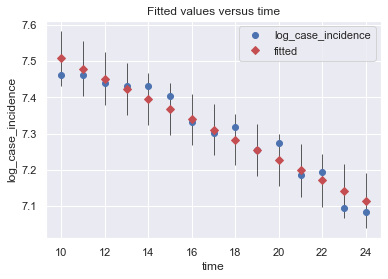

In [11]:
y, X = dmatrices('log_case_incidence ~ time', 
                 data = dataframe)
model = sma.OLS(y, X)
res = model.fit()
print(res.summary())
fig = sm.graphics.regressionplots.plot_fit(res, 1)
print(f"doublign time = {m.log(2)/res.params[1]}")

In [12]:
data_subset = infection_counts

In [13]:
growth_rates = []
doubling_times = []
for _ in range(data_subset.shape[0]):
    print(f"current fit; {_}", end = "\r")
    
    log_diff = data_subset.iloc[_].diff(1).apply(lambda x: np.log(x))

    data_set_up = {
        "log_case_incidence": log_diff[10:25],
        "time": list(range(10, 25))
    }
    dataframe = pd.DataFrame(data_set_up)
    dataframe = pd.DataFrame(data_set_up)
    
    y, X = dmatrices('log_case_incidence ~ time', 
                     data = dataframe)
    model = sma.RLM(y, X)
    res = model.fit()
    growth_rates.append(res.params[1])

    if res.params[1] == -float("inf"):
        print(f"missing data in line {_}")

In [14]:
x = pd.Series(growth_rates) # 200 values
#x = x[x.between(x.quantile(.05), x.quantile(.95))] # without outliers

Text(0.5, 1.0, 'Distribution of Growth Rates')

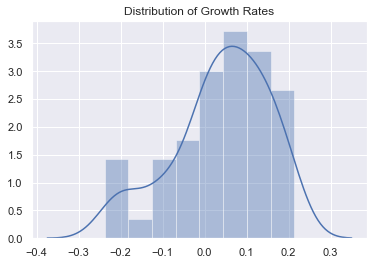

In [15]:
sns.distplot(x)
plt.title("Distribution of Growth Rates")

In [16]:
data_pars = data[data.columns[0:9]]
growth_rate_series = pd.Series(growth_rates)
data_pars["growth_rate"] = growth_rate_series

C:\Users\mfyles\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
data_pars

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,reduce_contacts_by,two_step_tracing,prob_has_trace_app,prob_household_prop_not_adhere,prob_not_adhere,growth_rate
0,0.826711,0.2,0.918432,1.745319,0.373522,True,0.494691,0.241427,0.036944,0.106550
1,0.822938,0.3,0.718434,2.120258,0.457698,False,0.407553,0.119033,0.023493,0.071233
2,0.811619,0.6,0.738272,2.011819,0.653130,False,0.072193,0.030889,0.028907,-0.053520
3,0.830484,0.1,0.888834,2.093165,0.639923,True,0.388804,0.140118,0.027750,0.016587
4,0.807846,0.7,0.933077,2.020412,0.840514,True,0.318710,0.118894,0.012962,-0.195755
...,...,...,...,...,...,...,...,...,...,...
95,0.815392,0.5,0.884736,1.956071,0.775533,False,0.283914,0.236424,0.029819,-0.108584
96,0.807846,0.7,0.938855,2.136855,0.847479,False,0.495060,0.110626,0.012381,-0.216014
97,0.811619,0.6,0.813077,1.805257,0.325964,False,0.457789,0.087335,0.027853,0.063042
98,0.815392,0.5,0.859704,2.258597,0.707612,True,0.294505,0.037219,0.046937,-0.063148


                            OLS Regression Results                            
Dep. Variable:            growth_rate   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1189.
Date:                Sat, 09 May 2020   Prob (F-statistic):           2.82e-87
Time:                        16:25:05   Log-Likelihood:                 301.54
No. Observations:                 100   AIC:                            -587.1
Df Residuals:                      92   BIC:                            -566.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

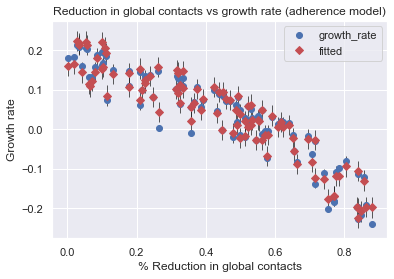

In [18]:
y, X = dmatrices('growth_rate ~ reduce_contacts_by + I(reduce_contacts_by**2) + I(prob_has_trace_app**2) + contact_tracing_success_prob + contact_trace_delay_par + infection_reporting_prob + two_step_tracing', 
                 data = data_pars)
model_2 = sma.OLS(y, X)
res = model_2.fit()
print(res.summary())
sm.graphics.regressionplots.plot_fit(res, "reduce_contacts_by")

plt.xlabel("% Reduction in global contacts")
plt.ylabel("Growth rate")
plt.title("Reduction in global contacts vs growth rate (adherence model)")
plt.savefig("Figures/Simulation - no test delay adherence model/growth_rate_global_contacts.png")


## Residuals vs Fitted Value

There doesn't appear to be any systematic deviation from our predicted value

Text(0, 0.5, 'Residual')

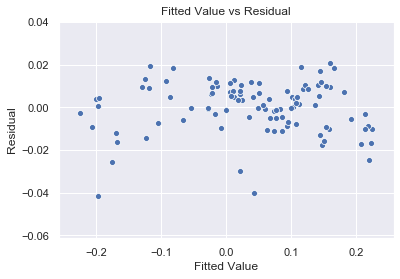

In [19]:
sns.scatterplot(res.fittedvalues, res.resid)
plt.title("Fitted Value vs Residual")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")

## Residual Distribution

Text(0.5, 1.0, 'Distribution of the residuals')

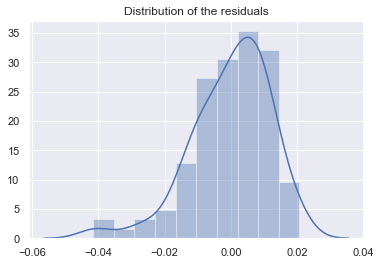

In [20]:
sns.distplot(res.resid)
plt.title("Distribution of the residuals")

Sort of normally distributed

## Normality of residuals tests

In [21]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res.resid)
lzip(name, test)

[('Jarque-Bera', 24.73869320915264),
 ('Chi^2 two-tail prob.', 4.2467923355125375e-06),
 ('Skew', -0.9779449069928664),
 ('Kurtosis', 4.453196960409527)]

## Heteroskedasticity tests

We have strong heteroscedasticity in our data

In [22]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 11.620727865161328),
 ('p-value', 0.11374172958423116),
 ('f-value', 1.7281152303994753),
 ('f p-value', 0.11201148967105674)]

## Comparison to reference distributions

In [23]:
reference_coefs = pd.read_excel("Data/Reference/OLS_coefficients.xlsx", index_col = 0)
reference_coefs

,intercept,coef_contact_reduction,coef_contact_reduction**2
0,0.213732,-0.152942,-0.289244


In [24]:
c = reference_coefs["intercept"].loc[0]
beta_0 = reference_coefs["coef_contact_reduction"].loc[0]
beta_1 = reference_coefs["coef_contact_reduction**2"].loc[0]
x = np.linspace(0, 0.9)
y = c + beta_0*x + beta_1*x**2

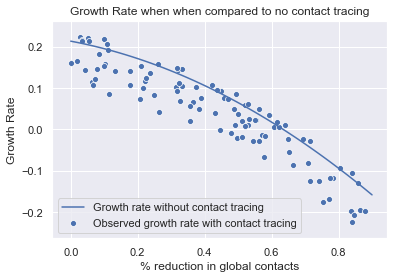

In [25]:
sns.scatterplot(data_pars["reduce_contacts_by"], res.fittedvalues)
plt.plot(x, y)
plt.legend(("Growth rate without contact tracing", "Observed growth rate with contact tracing"))
plt.title("Growth Rate when when compared to no contact tracing")
plt.ylabel("Growth Rate")
plt.xlabel("% reduction in global contacts")
plt.savefig("Figures/Simulation - no test delay adherence model/growth_rate_comparison.svg")